In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/hakangurler/Desktop/Original data'

In [3]:
df = pd.read_pickle(os.path.join(path, 'final_instacart_data.pkl'))

In [4]:
df.shape

(32434212, 29)

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 29 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_since_prior_order         float64 
 6   product_id                     float64 
 7   add_to_cart_order              float64 
 8   reordered                      float64 
 9   product_name                   object  
 10  aisle_id                       int64   
 11  department_id                  int64   
 12  prices                         float64 
 13  _merge                         category
 14  max_order                      int64   
 15  loyalty_flag                   object  
 16  avg_price                      float64 
 17  spender_flag             

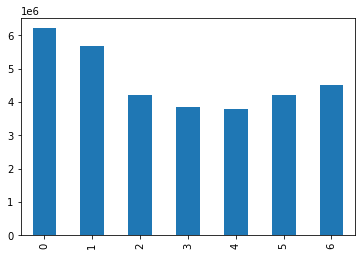

In [11]:
# Create a bar chart sorted on index (0-6)
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

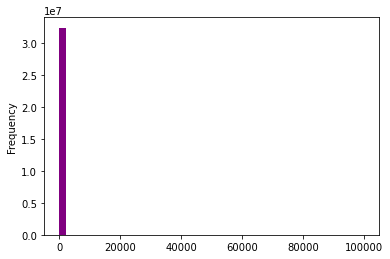

In [12]:
# Creating histogram to show frequency of prices
hist = df['prices'].plot.hist(bins = 50, color = 'purple')

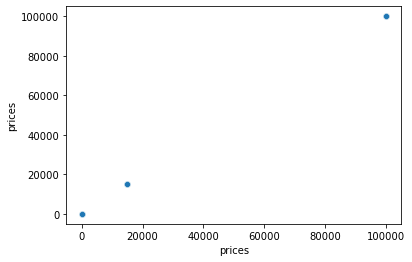

In [13]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [14]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
# Store 70% of the sample in data frame big
big = df[dev]

In [16]:
# Store 30% of the sample in data frame small
small = df[~dev]

In [17]:
# Checking length is correct
len(big)+len(small)

32434212

In [19]:
# Creating new data frame with just the columns needed for the line chart
df_small = small[['orders_day_of_week','prices']]

In [21]:
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32434188,1,10.7
32434191,2,10.7
32434199,4,10.7
32434204,2,10.7


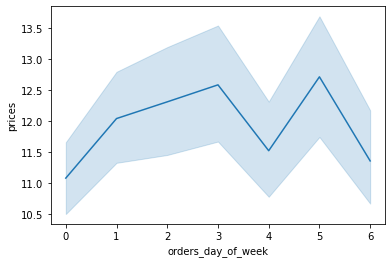

In [22]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

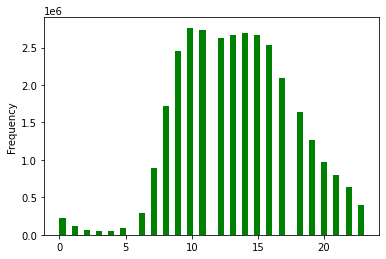

In [23]:
# Create a histogram of the “order_hour_of_day” column

hist2 = df['order_hour_of_day'].plot.hist(bins = 50, color = 'green')

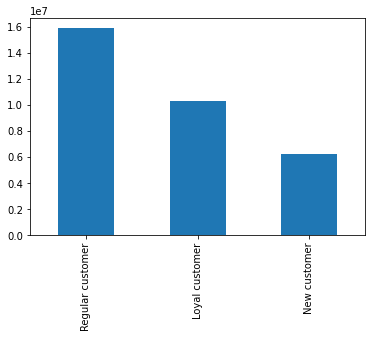

In [24]:
# Create a bar chart from the “loyalty_flag” column.
bar = df['loyalty_flag'].value_counts().plot.bar()

In [25]:
# Creating new data frame with just the columns needed for the line chart
df_small_2 = small[['order_hour_of_day','prices']]

In [27]:
df_small_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9729729 entries, 0 to 32434209
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_hour_of_day  int64  
 1   prices             float64
dtypes: float64(1), int64(1)
memory usage: 222.7 MB


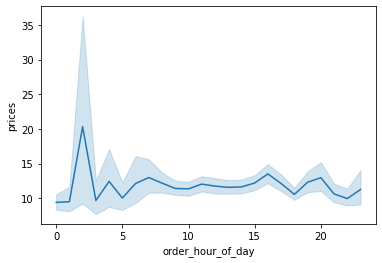

In [28]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

In [29]:
# Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['age','no_of_dependants']]


In [30]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32434188,25,0
32434191,25,0
32434199,25,0
32434204,25,0


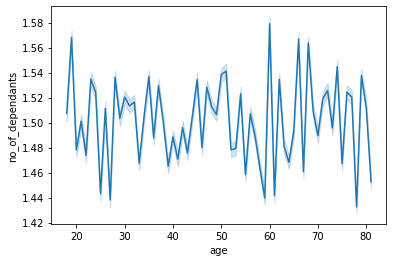

In [31]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

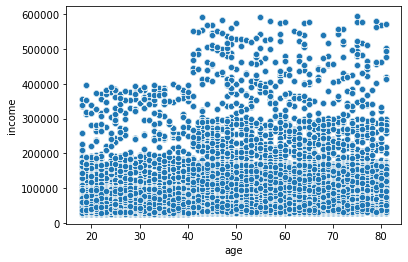

In [32]:
# You’ll also need to explore whether there’s a connection between age and spending power (income).

scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df)

In [33]:
line.figure.savefig(os.path.join(path, 'line_dow_prices.png'))

In [34]:
hist2.figure.savefig(os.path.join(path, 'exp_hour_of_day.png'))

In [35]:
bar.figure.savefig(os.path.join(path, 'bar_loyalty_flag.png'))

In [36]:
line_2.figure.savefig(os.path.join(path, 'line_hour_prices.png'))

In [37]:
line_3.figure.savefig(os.path.join(path, 'line_age_no_of_dependants.png'))

In [38]:
scatter_2.figure.savefig(os.path.join(path, 'scatter_age_income.png'))